In [102]:
#importing the important libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb


In [103]:
#importing the dataset 

df = pd.read_csv("http://bit.ly/w-data")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [104]:
# this is for information about the entries in the dataset 
df.info()
print("---------------------------------------------------------")
# to check whether any null value present or not in the table
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
---------------------------------------------------------


Hours     0
Scores    0
dtype: int64

Text(0, 0.5, 'SCORES')

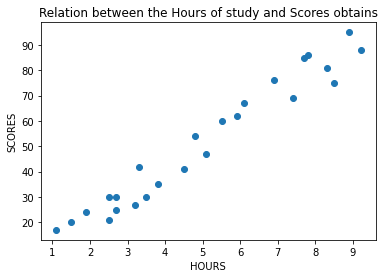

In [105]:
#scatter plot of the data set to visualising the dataset
X = df["Hours"].values
Y = df["Scores"].values
pt.scatter(X,Y)
pt.title("Relation between the Hours of study and Scores obtains")
pt.xlabel("HOURS")
pt.ylabel("SCORES")

Text(0, 0.5, 'SCORES')

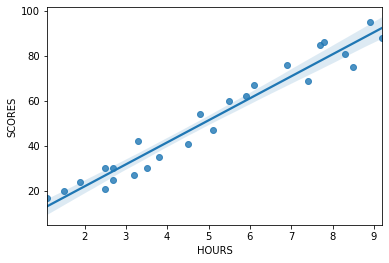

In [106]:
#plotting the regressor plot
sb.regplot(X,Y,data = df)
pt.xlabel("HOURS")
pt.ylabel("SCORES")

In [107]:
#splitting the data into dependent variable(Y) and independent variable(X)
X = df[['Hours']].values
Y = df[['Scores']].values
#split the data into training set and test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [108]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train) # fitting the model 
print(regressor.coef_)
print(regressor.intercept_)

[[9.91065648]]
[2.01816004]


In [109]:
print('Training Score')
print(regressor.score(x_train,y_train))
print('Test Score')
print(regressor.score(x_test,y_test))

Training Score
0.9515510725211552
Test Score
0.9454906892105355


Text(0, 0.5, 'SCORES')

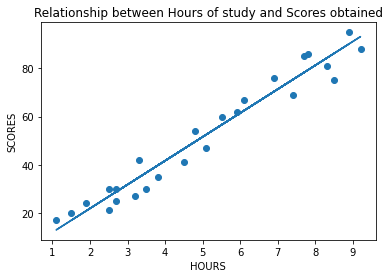

In [110]:
#plotting the regression line 
line = regressor.coef_ * X + regressor.intercept_
pt.scatter(X,Y)
pt.plot(X,line)
pt.title('Relationship between Hours of study and Scores obtained')
pt.xlabel('HOURS')
pt.ylabel('SCORES')

In [111]:
y_pred = regressor.predict(x_test)
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [112]:
print(y_test)

[[20]
 [27]
 [69]
 [30]
 [62]]


In [113]:
#What will be predicted score if a student study for 9.25 hrs in a day?
print("No.of Hours = ",9.25)
print("Predicted Scores= ",regressor.predict([[9.25]])[0][0])

No.of Hours =  9.25
Predicted Scores=  93.69173248737535


In [101]:
#Evaluating the model, finding the value of MAE,MSE and RMSE
from sklearn import metrics
print('MAE :',metrics.mean_absolute_error(y_test,y_pred) )
print('MSE : ',metrics.mean_squared_error(y_test,y_pred) )
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE : 4.183859899002975
MSE :  21.598769307217406
RMSE :  4.647447612100367
